## US Airlines Tweet Sentiment Analysis using GloVe (Global Vectors for Word Representation) and LSTM

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np

In [156]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [111]:
df = pd.read_csv("Tweets.csv")
df=df.drop(columns=['tweet_id','negativereason','airline','retweet_count','airline_sentiment_confidence','negativereason_confidence','airline_sentiment_gold','name','negativereason_gold','tweet_coord','tweet_created','tweet_location','user_timezone'])
df['airline_sentiment']=df['airline_sentiment'].replace('neutral','positive')
df=df.dropna(how='any')
df


,airline_sentiment,text
0,positive,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,positive,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,positive,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [112]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sentiment']=le.fit_transform(df['airline_sentiment'])
df=df.drop(columns=['airline_sentiment'])
df

,text,sentiment
0,@VirginAmerica What @dhepburn said.,1
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
...,...,...
14635,@AmericanAir thank you we got on a different f...,1
14636,@AmericanAir leaving over 20 minutes Late Flig...,0
14637,@AmericanAir Please bring American Airlines to...,1
14638,"@AmericanAir you have my money, you change my ...",0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'distribution')

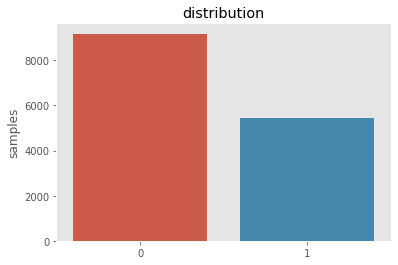

In [113]:
x = df["sentiment"].value_counts()
plt.grid()
sns.barplot(x.index, x)
plt.gca().set_ylabel("samples")
plt.title("distribution")

Text(0.5, 1.0, 'Airline tweets length')

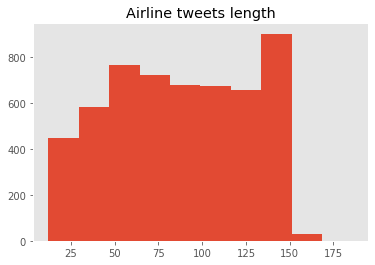

In [114]:

plt.grid()

plt.hist(df[df["sentiment"] == 1]["text"].str.len())
plt.title("Airline tweets length")

Text(0.5, 1.0, 'Airline tweets length')

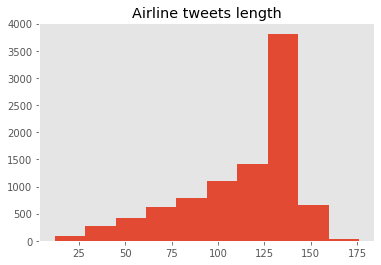

In [115]:

plt.grid()

plt.hist(df[df["sentiment"] == 0]["text"].str.len())
plt.title("Airline tweets length")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Airline tweets length')

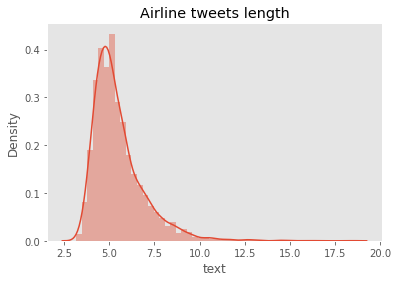

In [116]:

plt.grid()

word1 = df[df["sentiment"] == 1]["text"].str.split().apply(lambda x:[len(i) for i in x])
sns.distplot(word1.map(lambda x: np.mean(x)))
plt.title("Airline tweets length")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Airline tweets length')

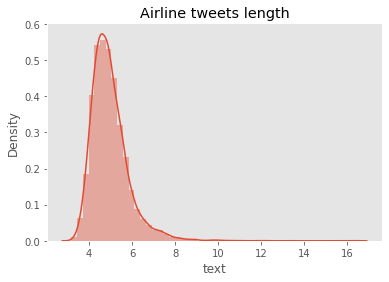

In [117]:

plt.grid()

word1 = df[df["sentiment"] == 0]["text"].str.split().apply(lambda x:[len(i) for i in x])
sns.distplot(word1.map(lambda x: np.mean(x)))
plt.title("Airline tweets length")

In [118]:
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.util import ngrams

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
def create_corpus(sent):
    corpus = []
    for x in df[df["sentiment"] == sent]["text"].str.split():
        print(x)
        for i in x:
            corpus.append(i)
            
    return corpus

In [120]:
corpus = create_corpus(0)

stop = set(stopwords.words("english"))

dictionary = defaultdict(int)
for word in corpus:
    if word in stop:
        dictionary[word] +=1
        
top = sorted(dictionary.items(), key = lambda x:x[1], reverse=True)[:10]

Streaming output truncated to the last 5000 lines.
['@JetBlue', '👍.', 'I', 'think', "I'll", 'come', 'take', 'a', 'nap', 'at', 'the', 'terminal.', ';)']
['@JetBlue', 'Safety', 'might', 'be', 'your', 'priority', 'but', 'organization', 'clearly', 'is', 'not.']
['@JetBlue', '#611', 'from', 'JFK', 'to', 'LAS', 'still', 'delayed?']
['@JetBlue', 'the', 'lack', 'of', 'TV', 'made', 'it', 'rough,', "that's", 'literally', 'why', 'I', 'picked', "y'all", 'over', 'the', 'competitors.']
['@JetBlue', 'But', 'not', 'reddit?', 'I', 'work', 'for', 'the', 'site', 'and', 'this', 'is', 'ridiculous.']
['@JetBlue', 'i', 'only', 'take', 'jetblue', 'to', 'travel', 'and', 'i', 'have', 'to', 'go', 'to', 'maimi', 'next', 'year', 'but', 'you', 'guys', 'dont', 'go', 'to', 'maimi😭', 'why', 'dont', 'you', 'guys', 'go', 'to', 'maimi???']
['@JetBlue', 'aka', 'take', 'stuff', 'out', 'of', 'the', 'checked', 'bag!', 'Then', 'just', 'carry', 'on', 'the', 'extra', 'weight.', 'For', 'someone', 'just', 'had', 'shoulder', 'surg

Text(0.5, 1.0, 'Punctuation airline sentiment 0')

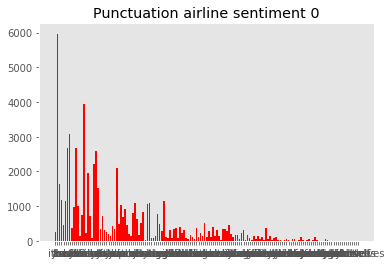

In [121]:

x,y = zip(*dictionary.items())

plt.grid()
plt.bar(x,y, color = 'r')
plt.title("Punctuation airline sentiment 0")

#**Common words**

In [122]:
from collections import Counter

In [123]:
counter = Counter(corpus)
most = counter.most_common()
x = []
y = []

for word, count in most[:40]:
    if word not in stop:
        x.append(word)
        y.append(count)

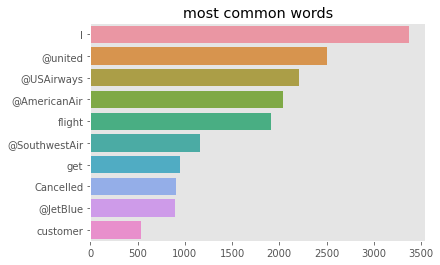

In [124]:
plt.title("most common words")
plt.grid()
sns.barplot(x = y, y = x)

In [125]:
df

,text,sentiment
0,@VirginAmerica What @dhepburn said.,1
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
...,...,...
14635,@AmericanAir thank you we got on a different f...,1
14636,@AmericanAir leaving over 20 minutes Late Flig...,0
14637,@AmericanAir Please bring American Airlines to...,1
14638,"@AmericanAir you have my money, you change my ...",0


#**Removing URLs**

In [126]:
import re

In [127]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [128]:
df["text"] = df["text"].apply(lambda x: remove_url(x))

In [129]:
df

,text,sentiment
0,@VirginAmerica What @dhepburn said.,1
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
...,...,...
14635,@AmericanAir thank you we got on a different f...,1
14636,@AmericanAir leaving over 20 minutes Late Flig...,0
14637,@AmericanAir Please bring American Airlines to...,1
14638,"@AmericanAir you have my money, you change my ...",0


#**Removing HTML**

In [130]:
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

In [131]:
df["text"] = df["text"].apply(lambda x: remove_html(x))

In [132]:
df

,text,sentiment
0,@VirginAmerica What @dhepburn said.,1
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
...,...,...
14635,@AmericanAir thank you we got on a different f...,1
14636,@AmericanAir leaving over 20 minutes Late Flig...,0
14637,@AmericanAir Please bring American Airlines to...,1
14638,"@AmericanAir you have my money, you change my ...",0


#**Removing Emojis**

In [133]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" #emoticons
                               u"\U0001F300-\U0001F5FF" #symbols&pics
                               u"\U0001F680-\U0001F6FF" #transportation pic
                               u"\U0001F1E0-\U0001F1FF" #flags
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"    
                               "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [134]:
df["text"] = df["text"].apply(lambda x: remove_emoji(x))

In [135]:
df

,text,sentiment
0,@VirginAmerica What @dhepburn said.,1
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
...,...,...
14635,@AmericanAir thank you we got on a different f...,1
14636,@AmericanAir leaving over 20 minutes Late Flig...,0
14637,@AmericanAir Please bring American Airlines to...,1
14638,"@AmericanAir you have my money, you change my ...",0


#**Removing Punctuation**

In [136]:
import string

In [137]:
def remove_punctuation(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [138]:
df["text"] = df["text"].apply(lambda x: remove_punctuation(x))

In [139]:
df

,text,sentiment
0,VirginAmerica What dhepburn said,1
1,VirginAmerica plus youve added commercials to ...,1
2,VirginAmerica I didnt today Must mean I need t...,1
3,VirginAmerica its really aggressive to blast o...,0
4,VirginAmerica and its a really big bad thing a...,0
...,...,...
14635,AmericanAir thank you we got on a different fl...,1
14636,AmericanAir leaving over 20 minutes Late Fligh...,0
14637,AmericanAir Please bring American Airlines to ...,1
14638,AmericanAir you have my money you change my fl...,0


#**Correction of Spellings**

In [77]:
pip install pyspellchecker

In [78]:
from spellchecker import SpellChecker

In [79]:
spell = SpellChecker()

def correct_spellings(text):
    corrected_text = []
    
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [ ]:
#df['text']=df['text'].apply(lambda x : correct_spellings(x))

In [ ]:
df

#**Model Construction**

In [140]:
from tqdm import tqdm
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D, Dropout
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [141]:
def create_corpus(df):
    corpus = []
    for tweet in tqdm(df["text"]):
        words = [word.lower() for word in word_tokenize(tweet) if \
        ((word.isalpha() == 1) & (word not in stop))]
        corpus.append(words)
        
    return corpus

In [83]:
corpus = create_corpus(df)

100%|██████████| 14640/14640 [00:02<00:00, 6883.69it/s]


#**Including Glove model**

In [157]:
embedding_dict = {}

with open('/content/drive/MyDrive/glove.6B.100d.txt','r') as glove:
    for line in glove:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding_dict[word] = vectors
        
glove.close()

In [158]:
MAX_LEN = 50
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(corpus)

sequences = tokenizer_obj.texts_to_sequences(corpus)

tweet_pad = pad_sequences(sequences,
                          maxlen = MAX_LEN, 
                         truncating = 'post', 
                         padding = 'post')

In [159]:
word_index = tokenizer_obj.word_index
print('number of unique words: ', len(word_index))

number of unique words:  11252


In [160]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words,100))


for word, i in tqdm(word_index.items()):
    if i > num_words:
        continue
        
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 11252/11252 [00:00<00:00, 329426.57it/s]


In [161]:
from keras import regularizers

model = Sequential()

glove_embedding = Embedding(num_words, 100, embeddings_initializer = Constant(embedding_matrix), 
                     input_length = MAX_LEN, 
                     trainable = False)

model.add(glove_embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(256, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

optimizer = Adam(learning_rate=1e-5)

model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ["accuracy"])

In [162]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 100)           1125300   
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [163]:
train_data = tweet_pad[:df.shape[0]]
test_data = tweet_pad[df.shape[0]:]

In [164]:
train_data

array([[161,   0,   0, ...,   0,   0,   0],
       [ 90,   0,   0, ...,   0,   0,   0],
       [131,   0,   0, ...,   0,   0,   0],
       ...,
       [430,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [288,   0,   0, ...,   0,   0,   0]], dtype=int32)

In [165]:
test_data

array([[ 172,    0,    0, ...,    0,    0,    0],
       [   6,    0,    0, ...,    0,    0,    0],
       [  74,    0,    0, ...,    0,    0,    0],
       ...,
       [ 144,    0,    0, ...,    0,    0,    0],
       [  11,    0,    0, ...,    0,    0,    0],
       [2307,    0,    0, ...,    0,    0,    0]], dtype=int32)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(train_data, df["sentiment"].values, test_size = 0.20)

In [168]:
hist = model.fit(X_train, y_train, batch_size = 1640, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
8/8 [==============================] - 16s 2s/step - loss: 0.7528 - accuracy: 0.6247 - val_loss: 0.7524 - val_accuracy: 0.6359
Epoch 2/50
8/8 [==============================] - 16s 2s/step - loss: 0.7524 - accuracy: 0.6247 - val_loss: 0.7520 - val_accuracy: 0.6359
Epoch 3/50
8/8 [==============================] - 17s 2s/step - loss: 0.7521 - accuracy: 0.6247 - val_loss: 0.7516 - val_accuracy: 0.6359
Epoch 4/50
8/8 [==============================] - 17s 2s/step - loss: 0.7518 - accuracy: 0.6247 - val_loss: 0.7513 - val_accuracy: 0.6359
Epoch 5/50
8/8 [==============================] - 17s 2s/step - loss: 0.7515 - accuracy: 0.6247 - val_loss: 0.7509 - val_accuracy: 0.6359
Epoch 6/50
8/8 [==============================] - 16s 2s/step - loss: 0.7511 - accuracy: 0.6247 - val_loss: 0.7505 - val_accuracy: 0.6359
Epoch 7/50
8/8 [==============================] - 17s 2s/step - loss: 0.7507 - accuracy: 0.6247 - val_loss: 0.7501 - val_accuracy: 0.6359
Epoch 8/50
8/8 [==================

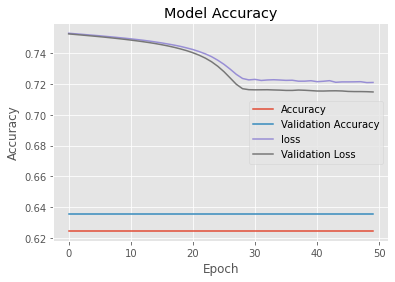

In [169]:
#Ploting Acuracy & Loss
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()